## **TIME SERIES ANALYSIS**


### **LIBRARIES FOR TIME SERIES ANALYSIS**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pylab import rcParams

### **LOAD DATA INTO A DATAFRAME**

In [3]:
df = pd.read_csv('passengers.txt')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df['Month'] = pd.to_datetime(df['Month']) # convert to datetime
df.set_index('Month', inplace=True) # set index to month

Text(0, 0.5, 'Passengers')

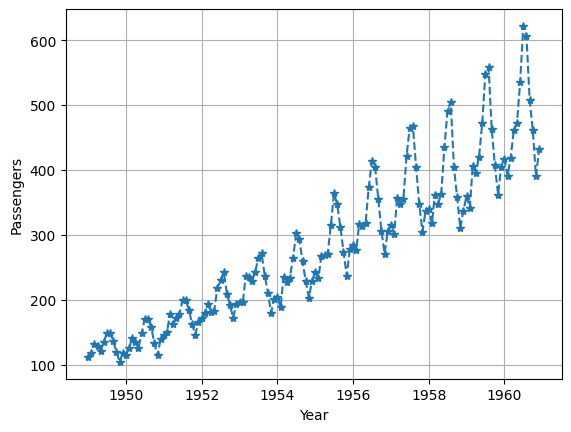

In [5]:
plt.plot(df.index, df['Passengers'], marker='*', linestyle='--');
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

In [6]:
df.isnull().values.any() # check for missing values

False

In [7]:
df_copy = df.copy() # makes a copy of the dataframe
row = df_copy.sample(frac=0.1, random_state=0) # randomly sample 10% of the data
row['Passengers'] = np.nan # set 'Passengers' to NaN

In [8]:
df_copy.loc[row.index, 'Passengers'] = row['Passengers'] # replace the values in the original dataframe with NaN
df_copy.isnull().sum() # check for missing values

Passengers    14
dtype: int64

### **FILLING MISSING VALUES**

In [9]:
df_copy_ffill = df_copy.fillna(method='ffill') # forward fill
df_copy_ffill.isnull().sum()

Passengers    0
dtype: int64

In [10]:
df_copy_bfill = df_copy.fillna(method='bfill') # backward fill
df_copy_bfill.isnull().sum()

Passengers    0
dtype: int64

In [11]:
df_copy_LIF = df_copy.interpolate(method='linear', limit_direction='forward') # linear interpolation forward
df_copy_LIF.isnull().sum()

Passengers    0
dtype: int64

In [12]:
df_copy_LIB = df_copy.interpolate(method='linear', limit_direction='backward') # linear interpolation backward
df_copy_LIB.isnull().sum()

Passengers    0
dtype: int64

### **DOWNSAMPLING AND UPSAMPLING**

In [13]:
df_quarterly = df_copy.resample('3M').mean() # resample to quarterly data

In [14]:
df_daily = df_copy.resample('D').mean() # resample to daily data

Text(0.5, 1.0, 'Upsampling')

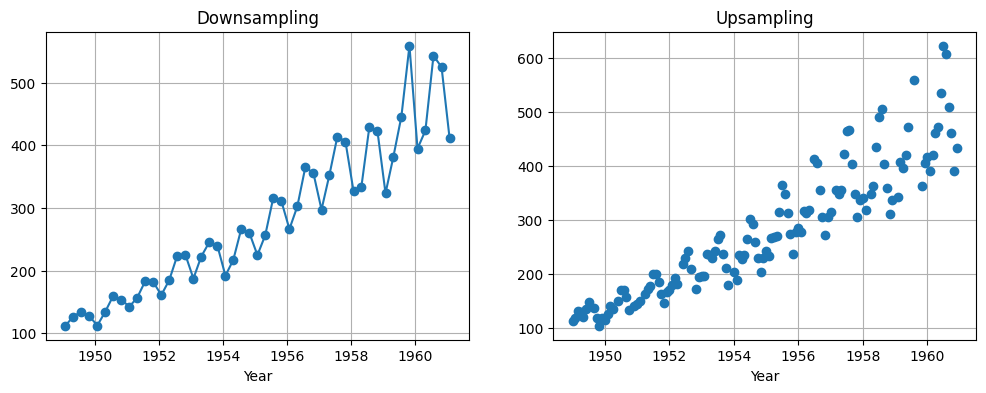

In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(df_quarterly.index, df_quarterly['Passengers'], marker='o', linestyle='-')
plt.grid()
plt.xlabel('Year')
plt.title('Downsampling')

plt.subplot(1, 2, 2)
plt.plot(df_daily.index, df_daily['Passengers'], marker='o', linestyle='-')
plt.grid()
plt.xlabel('Year')
plt.title('Upsampling')

### **SMOOTHING**

In [16]:
df_MA = df.copy()
MA = df_MA['Passengers'].rolling(12).mean() # 12-month moving average

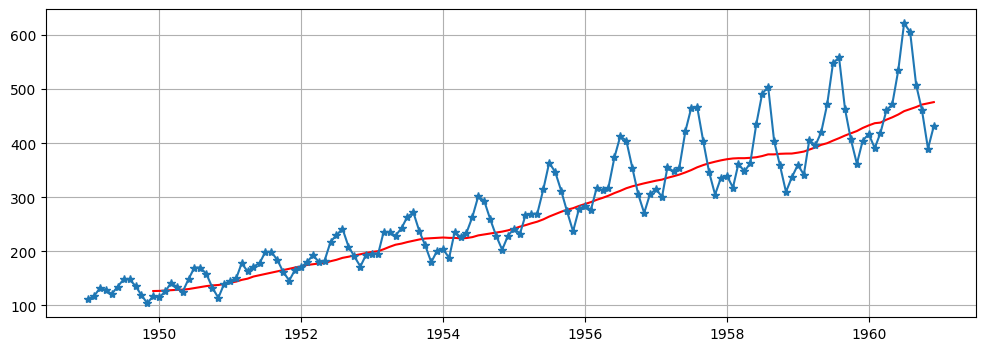

In [17]:
plt.figure(figsize=(12, 4))
plt.grid();
plt.plot(MA.index, MA.values, linestyle='-', color='red');
plt.plot(df.index, df['Passengers'], marker='*', linestyle='-');

### **TIME SERIES SPECIFIC EXPLORATORY METHODS**

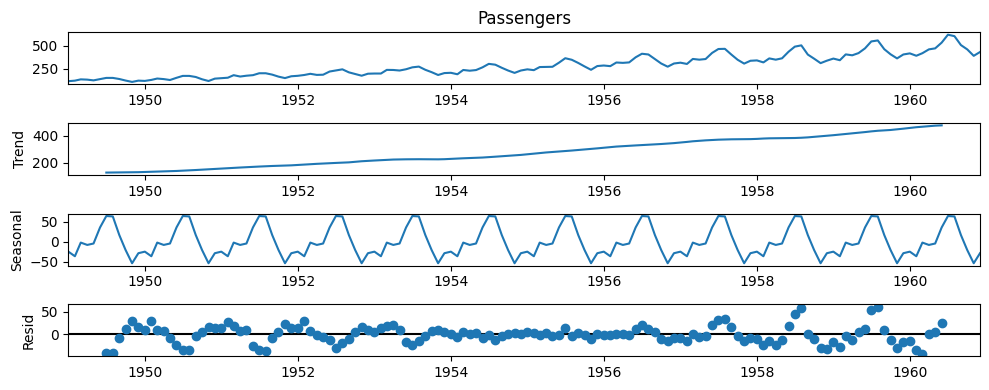

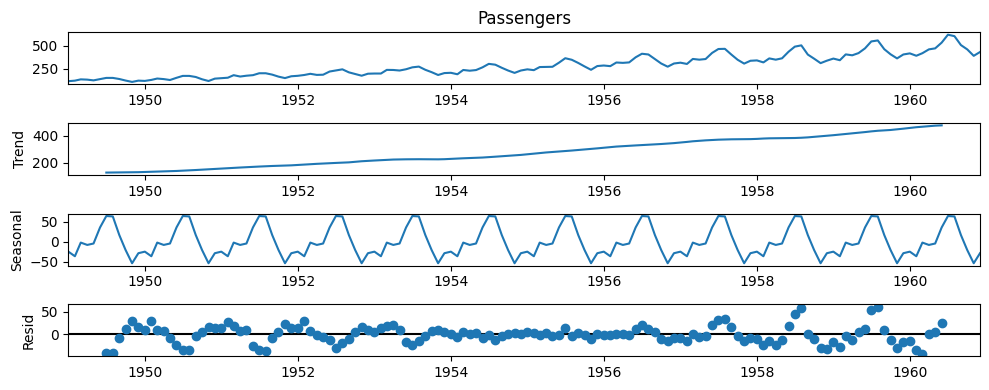

In [18]:
rcParams['figure.figsize'] = 10, 4
decompose_series = sm.tsa.seasonal_decompose(df['Passengers'], model='additive')
decompose_series.plot()

### **ADF TEST**

In [19]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['Passengers'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No of lags used: {adf_result[2]}')
print(f'No of observations used: {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: 0.8153688792060433
p-value: 0.9918802434376409
No of lags used: 13
No of observations used: 130
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


### **TRANSFORMATION AND DIFFERENCING**

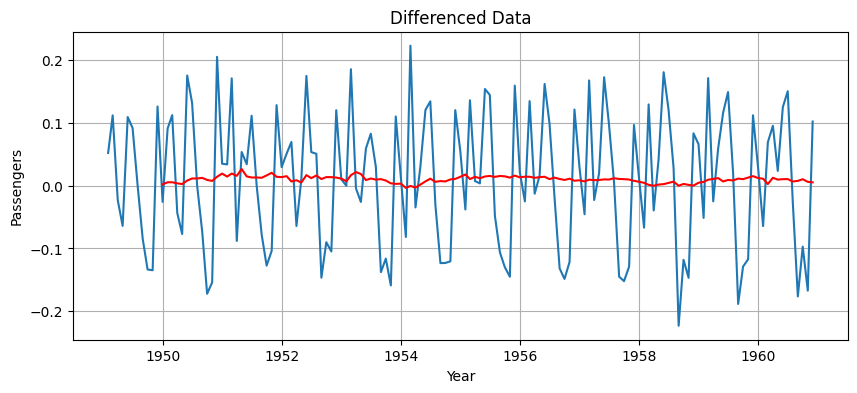

In [20]:
df_log = np.log(df)
df_diff = df_log.diff(periods = 1)
plt.plot(df_diff.index, df_diff.Passengers, '-');
plt.plot(df_diff.rolling(12).mean(), color='red');
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Differenced Data')
plt.grid()

### **TIME SERIES FORECASTING USING STOCHASTIC MODEL**

c:\Users\Aduragbemi\Documents\Hamoye-Internship\.venv\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


Text(0.5, 1.0, 'Partial Autocorrelation Plot')

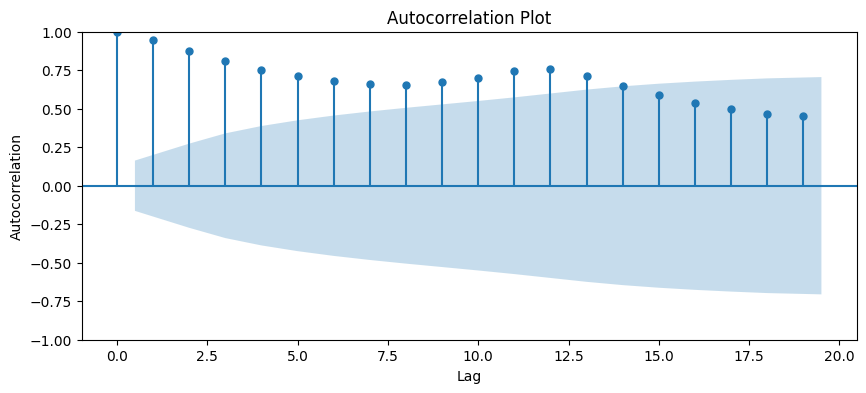

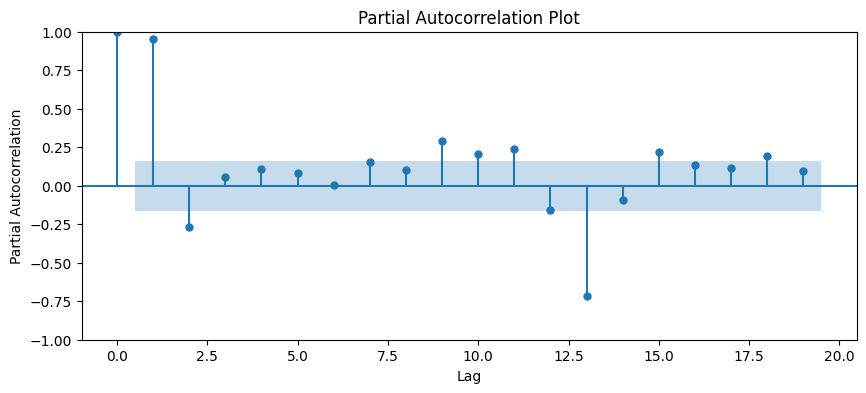

In [21]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot autocorrelation
plot_acf(df['Passengers'], lags=range(0, 20));
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')

# Plot partial autocorrelation
plot_pacf(df['Passengers'], lags=range(0, 20));
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Plot')

c:\Users\Aduragbemi\Documents\Hamoye-Internship\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Aduragbemi\Documents\Hamoye-Internship\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Aduragbemi\Documents\Hamoye-Internship\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


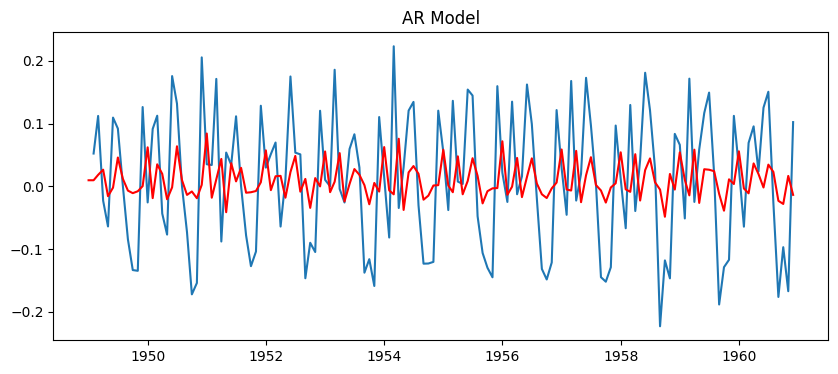

In [22]:
from statsmodels.tsa.arima.model import ARIMA  
#(p,d,q)  
AR_model = ARIMA(df_diff, order=(2 , 0 , 0 ))  
AR_model_results = AR_model.fit()  
plt.plot(df_diff);
plt.plot(AR_model_results.fittedvalues, color= 'red');
plt.title('AR Model');

c:\Users\Aduragbemi\Documents\Hamoye-Internship\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Aduragbemi\Documents\Hamoye-Internship\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Aduragbemi\Documents\Hamoye-Internship\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


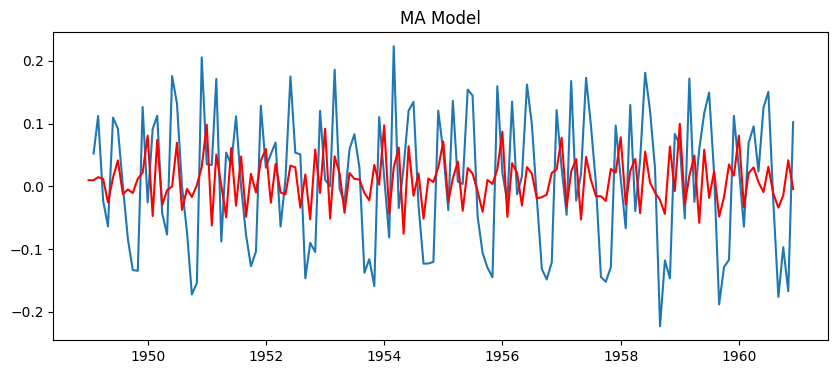

In [23]:
MA_model = ARIMA(df_diff, order=(0 , 0 , 2 ))  
MA_model_results = MA_model.fit()  
plt.plot(df_diff);
plt.plot(MA_model_results.fittedvalues, color= 'red' );
plt.title('MA Model');

c:\Users\Aduragbemi\Documents\Hamoye-Internship\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Aduragbemi\Documents\Hamoye-Internship\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Aduragbemi\Documents\Hamoye-Internship\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Aduragbemi\Documents\Hamoye-Internship\.venv\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


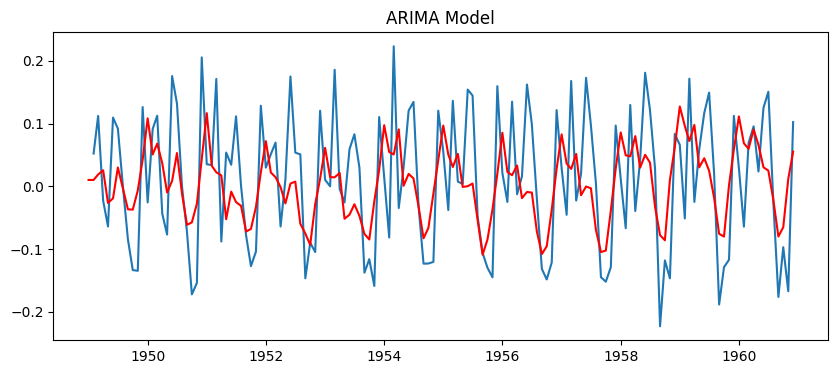

In [24]:
ARIMA_model = ARIMA(df_diff, order=( 2 , 0 , 1 ))  
ARIMA_results = ARIMA_model.fit()  
plt.plot(df_diff); 
plt.plot(ARIMA_results.fittedvalues, color= 'red' );
plt.title('ARIMA Model');

### **FACEBOOK PROPHET ON TIME SERIES**

In [30]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [31]:
df = pd.read_csv("passengers.txt")  
df['Month'] = pd.to_datetime(df['Month'])  
df = df.rename(columns={"Month": "ds", "Passengers": "y"})  
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [32]:
model = Prophet()  
model.fit(df)  
#predict   for   the   next   10   months  
future = model.make_future_dataframe(periods= 10, freq= 'M')  
forecast = model.predict(future)   
forecast.head()  

10:51:10 - cmdstanpy - INFO - Chain [1] start processing
10:51:10 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.662426,57.729803,113.127895,106.662426,106.662426,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,0.0,0.0,0.0,84.814159
1,1949-02-01,108.835452,49.132735,105.599864,108.835452,108.835452,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,0.0,0.0,0.0,78.227931
2,1949-03-01,110.798186,80.814464,141.291356,110.798186,110.798186,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,0.0,0.0,0.0,110.342237
3,1949-04-01,112.971212,80.836520,134.974748,112.971212,112.971212,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,0.0,0.0,0.0,107.810718
4,1949-05-01,115.074141,82.615699,139.969944,115.074141,115.074141,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,0.0,0.0,0.0,111.266255


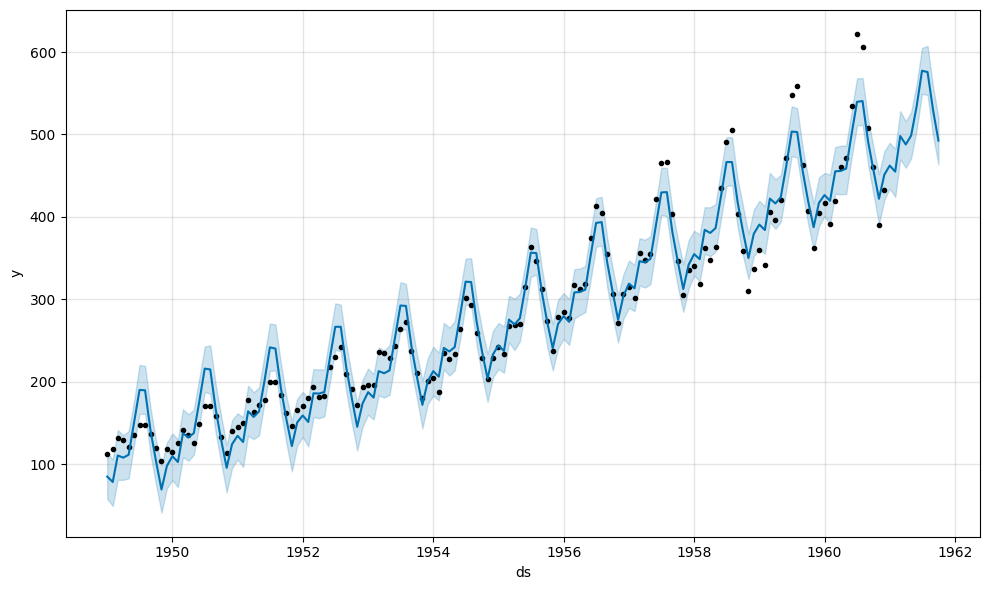

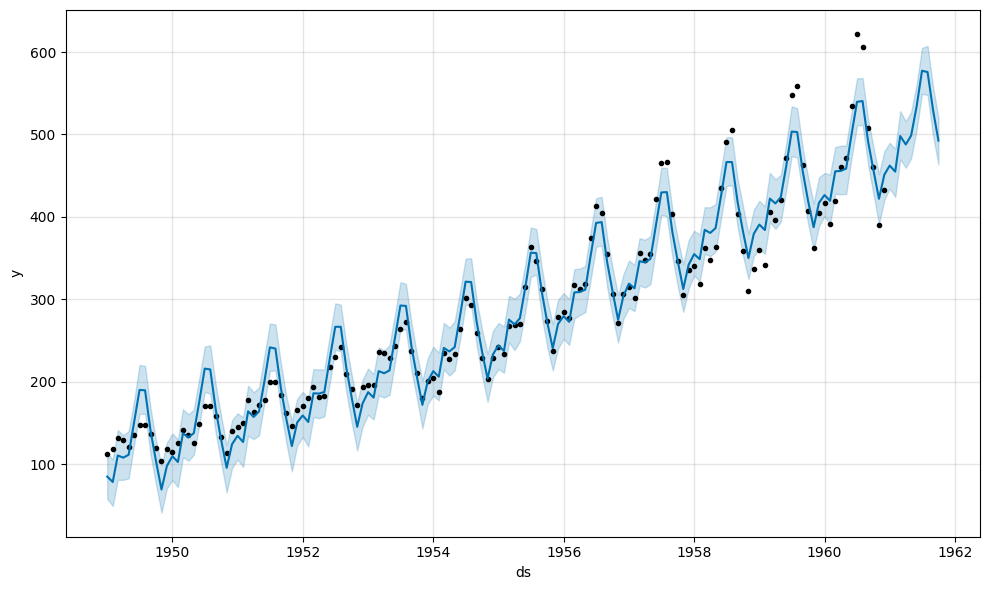

In [33]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]  
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries  
model.plot(forecast) 

In [35]:
plot_plotly(model, forecast)

In [36]:
plot_components_plotly(model, forecast)